합성곱 신경망

In [9]:
import tensorflow as tf
tf.keras.utils.set_random_seed(100)

In [10]:
# 데이터 불러오기

In [11]:
(train,target),(x_test,y_test) =  tf.keras.datasets.fashion_mnist.load_data()
train = train / 255.0
x_test = x_test / 255.0
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(train,target,test_size=0.2,random_state=100)

In [12]:
x_train.shape, x_val.shape

((48000, 28, 28), (12000, 28, 28))

In [13]:
# CNN 생성  c-p-c-p-fc
model = tf.keras.Sequential()     # 시퀀셜 객체
model.add(tf.keras.layers.Reshape( (28,28,1), input_shape=(28,28) ) )  # 입력층 데이터의 모양을 변경
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))  # 특성맵
model.add(tf.keras.layers.MaxPooling2D(2,2))                                      # 특성의 차수를 줄이는 역활
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
# FC - 밀집층 - 분류기 1차원이되어ㅣ야함
model.add(tf.keras.layers.Flatten())
# conv으로 부터 특성을 추출하고 줄이고... 데이터를 입력으로 받아서 계산해서 128뉴런(출력)
model.add(tf.keras.layers.Dense(128, activation='relu'))
# 출력층은 분류개수만큼 출력(확률)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# 컴파일 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
check_cp = tf.keras.callbacks.ModelCheckpoint('best.cnn.model.keras', save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val,y_val), callbacks=[check_cp, early_stop])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7939 - loss: 0.5757 - val_accuracy: 0.8841 - val_loss: 0.3085
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8961 - loss: 0.2884 - val_accuracy: 0.8990 - val_loss: 0.2689
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9139 - loss: 0.2371 - val_accuracy: 0.9031 - val_loss: 0.2620
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9264 - loss: 0.1999 - val_accuracy: 0.9106 - val_loss: 0.2422
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9393 - loss: 0.1665 - val_accuracy: 0.9162 - val_loss: 0.2343
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9497 - loss: 0.1388 - val_accuracy: 0.9186 - val_loss: 0.2369
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9582 - loss: 0.1138 - val_accuracy: 0.9181 - val_loss: 0.2716


In [18]:
best_model = tf.keras.models.load_model('best.cnn.model.keras')
best_model.evaluate(x_test,y_test), model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9098 - loss: 0.2709
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9098 - loss: 0.2709


([0.2691257894039154, 0.9103999733924866],
 [0.2691257894039154, 0.9103999733924866])

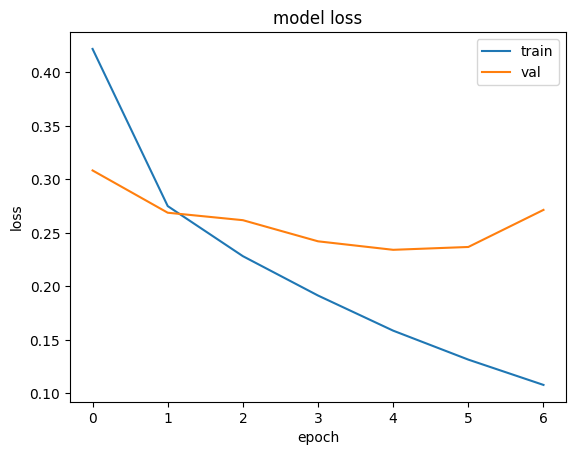

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [19]:
(X,y),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
X = X / 255.0
x_test = x_test / 255.
X.shape, y.shape, x_test.shape, y_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [20]:
x_train,x_val,y_train,y_val =  train_test_split(X,y,test_size=0.2,random_state=100)

In [24]:
import numpy as np
np.unique(y_train)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

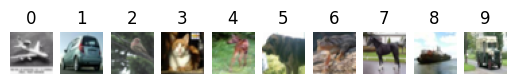

In [35]:
for i,idx in enumerate([np.where(y_train == i)[0][0] for i in range(10)]):
  plt.subplot(1,10,i+1)
  plt.axis('off')
  plt.title(i)
  plt.imshow(x_train[idx])
plt.show()

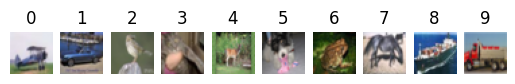

In [36]:
for i,idx in enumerate([np.where(y_train == i)[0][10] for i in range(10)]):
  plt.subplot(1,10,i+1)
  plt.axis('off')
  plt.title(i)
  plt.imshow(x_train[idx])
plt.show()

In [42]:
# C-P-C-P-FC
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# 컴파일 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
check_cp = tf.keras.callbacks.ModelCheckpoint('best.cnn.model.keras', save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val,y_val), callbacks=[check_cp, early_stop])

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3855 - loss: 1.6783 - val_accuracy: 0.5776 - val_loss: 1.2206
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6068 - loss: 1.1148 - val_accuracy: 0.6414 - val_loss: 1.0120
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6686 - loss: 0.9427 - val_accuracy: 0.6589 - val_loss: 0.9635
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7108 - loss: 0.8301 - val_accuracy: 0.6722 - val_loss: 0.9450
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7430 - loss: 0.7351 - val_accuracy: 0.6892 - val_loss: 0.9127
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7748 - loss: 0.6505 - val_accuracy: 0.6818 - val_loss: 0.9631
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8052 - loss: 0.5689 - val_accuracy: 0.6811 - val_loss: 1.0257
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8293 - loss: 0.4962 - 

In [40]:
best_model = tf.keras.models.load_model('best.cnn.model.keras')
best_model.evaluate(x_test,y_test), model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6508 - loss: 1.0181
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6508 - loss: 1.0181


([1.0115833282470703, 0.6563000082969666],
 [1.0115833282470703, 0.6563000082969666])

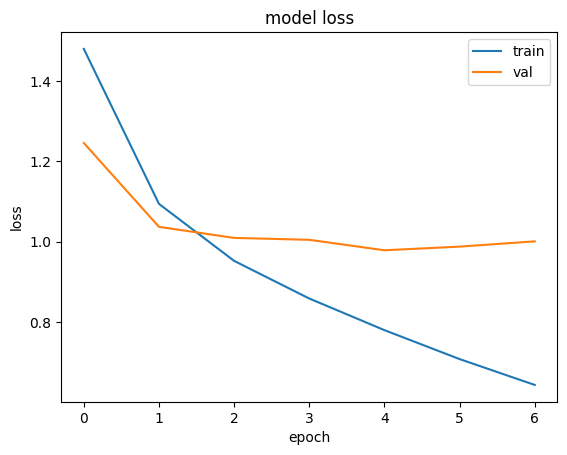

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()